# Notebook ini dikerjakan oleh: Prayoga Agusto Haradi, Batch HCK-004 untuk pengerjaan Milestone 1 pada Phase 0

- [Link Dataset](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)
- [Link Tableau](https://public.tableau.com/app/profile/prayoga.haradi/viz/Sales-2017-Final/ProfitabilityOverview)

## Tujuan Notebook

Tujuan notebook ini adalah untuk mengetahui trend pembelian berdasarkan kategori produk dan region dan state pada tahun 2017 untuk negara United States. 

## Problem Statement

Problem Statement pada kasus ini adalah untuk menentukan total sales dan profit pada United States pada tahun 2017, dan untuk menganalisis perbedaan total sales dan profit di berbagai region dan state berdasarkan kategorinya, untuk membuat strategi bisnis dan mengambil keputusan untuk rencana pada tahun 2018 dan kedepannya.

Pernyataan masalah ini bersifat spesifik karena berfokus pada penentuan alasan trend profitabilitas dan total penjualan pada tahun 2017. Dapat diukur (Measurable) karena berusaha menganalisis financial data perusahaan. Dapat dicapai (Achievable) karena didasarkan pada kinerja perusahaan di masa lalu dan bertujuan untuk mengidentifikasi langkah-langkah spesifik untuk meningkatkan profitabilitas dan penjualan. Relevan karena perusahaan ingin membuat strategi untuk meningkatkan keuntungannya pada tahun kedepannya, yang merupakan permasalahan umum bagi banyak bisnis. Dan bersifat terikat waktu (Time-Specific) karena bertujuan untuk mengidentifikasi langkah-langkah spesifik untuk meningkatkan profitabilitas dan penjualan dalam tahun kedepannya.

### Rumusan Masalah

Beberapa permasalahan yang akan difokuskan dalam notebook ini adalah:

1. Berapakah jumlah barang terjual dan total sales dan tiap kategori dan sub-kategori di United States?

2. Dimana kota, state dan region dengan jumlah sales terbanyak? 

3. Bagaimana trend total penjualan dan profit dari awal tahun ke akhir tahun 2017?

4. Bagaimana profit yang dihasilkan oleh Category, Sub-Category dan Segment?

5. Bagaimana perbandingan antara profit dan sales untuk tiap segment?
 
6. Bagaimana profit ratio dari tiap state?

7. Bagaimana Total Diskon dari tiap region berdasarkan tiap kategorinya?

8. Bagaimana central tendency dan variasi dari profit untuk tiap region?  Apakah ada outlier dari tiap region?

9. Apakah ada stastical significance pada rata-rata profit tiap region dibandingkan dengan satu sama lain?

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Data Loading

In [2]:
df = pd.read_csv('Sample - Superstore.csv',encoding='windows-1252')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [4]:
df.shape

(9994, 21)

## Data Cleaning

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
# Detecting non float
def nst_missingvalue(x):
    cnt=0
    for row in df[str(x)]:
        try:
            float(row)
        except ValueError:
            df.loc[cnt, x]=np.nan
            pass
        cnt+=1

In [8]:
nst_missingvalue('Sales')

In [9]:
nst_missingvalue('Discount')

In [10]:
nst_missingvalue('Profit')

In [11]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [12]:
df[['Ship Date','Order Date']] = df[['Ship Date','Order Date']].apply(pd.to_datetime)

In [13]:
df['Order Date'].sort_values()

7980   2014-01-03
739    2014-01-04
740    2014-01-04
741    2014-01-04
1759   2014-01-05
          ...    
5091   2017-12-30
908    2017-12-30
907    2017-12-30
1296   2017-12-30
906    2017-12-30
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [14]:
df = df[(df['Order Date'] >= '2017-01-01') & (df['Order Date'] < '2018-01-01')]

In [15]:
df = df.sort_values('Order Date')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
8069,8070,CA-2017-151750,2017-01-01,2017-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
8075,8076,CA-2017-151750,2017-01-01,2017-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,OFF-AP-10004708,Office Supplies,Appliances,Fellowes Superior 10 Outlet Split Surge Protector,15.224,2,0.8,-38.8212
848,849,CA-2017-107503,2017-01-01,2017-01-06,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Lorain,...,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
8074,8075,CA-2017-151750,2017-01-01,2017-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748,14,0.8,-22.6842
8073,8074,CA-2017-151750,2017-01-01,2017-01-05,Standard Class,JM-15250,Janet Martin,Consumer,United States,Huntsville,...,77340,Central,OFF-BI-10000301,Office Supplies,Binders,GBC Instant Report Kit,6.470,5,0.8,-9.7050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
645,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,...,47201,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2,0.0,56.5110
908,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
1297,1298,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


## Poin Penjabaran

### 1. Berapakah jumlah barang terjual dan total sales dan  tiap kategori dan sub-kategori di United States?

Kita akan menjawab penjabaran diatas menggunakan metode df.groupby lalu menyortir berdasarkan nilai yang paling tinggi

In [16]:
df.groupby(['Category','Sub-Category'])['Quantity'].size().sort_values(ascending=False).reset_index(name='Amount_Sold')

,Category,Sub-Category,Amount_Sold
0,Office Supplies,Binders,500
1,Office Supplies,Paper,459
2,Furniture,Furnishings,316
3,Technology,Phones,294
4,Office Supplies,Storage,288
5,Office Supplies,Art,282
6,Technology,Accessories,275
7,Furniture,Chairs,190
8,Office Supplies,Appliances,165
9,Office Supplies,Labels,114


In [17]:
df.groupby(['Category','Sub-Category'])['Sales'].sum().sort_values(ascending=False).reset_index(name='Sales_Total')

,Category,Sub-Category,Sales_Total
0,Technology,Phones,105340.5160
1,Furniture,Chairs,95554.3530
2,Office Supplies,Binders,72788.0450
3,Office Supplies,Storage,69677.6180
4,Technology,Copiers,62899.3880
5,Furniture,Tables,60893.5425
6,Technology,Accessories,59946.2320
7,Technology,Machines,43544.6750
8,Office Supplies,Appliances,42926.9320
9,Furniture,Bookcases,30024.2797


In [18]:
df.groupby('Category')['Sales'].sum()

Category
Furniture          215387.2692
Office Supplies    246097.1750
Technology         271730.8110
Name: Sales, dtype: float64

In [19]:
df.groupby('Category')['Sales'].count()

Category
Furniture           686
Office Supplies    2002
Technology          624
Name: Sales, dtype: int64

Text(0.5, 1.0, 'Jumlah Sales Per Sub-Kategori')

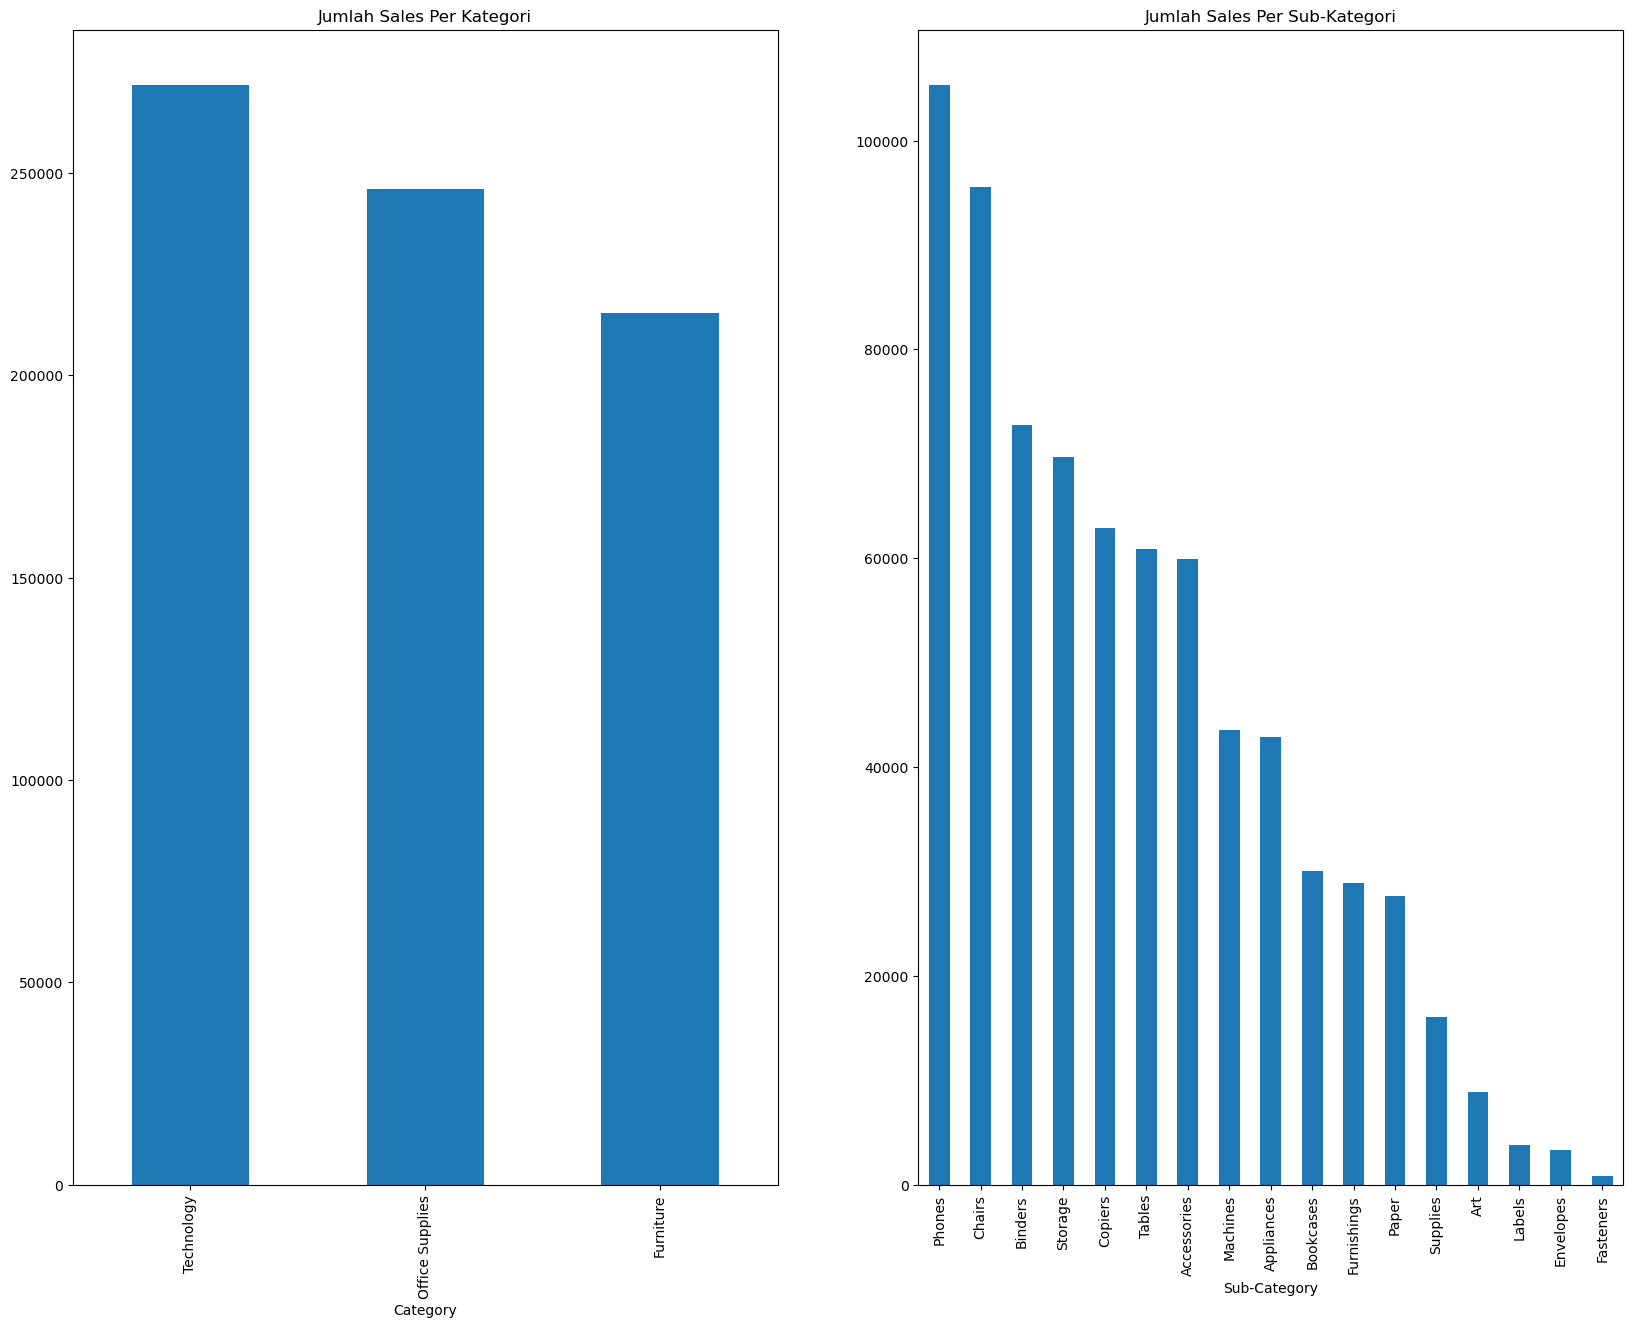

In [20]:
fig, axs = plt.subplots(2, figsize=(20, 15))
plt.subplot(1, 2, 1)
df.groupby('Category')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Jumlah Sales Per Kategori")
plt.subplot(1, 2, 2)
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Jumlah Sales Per Sub-Kategori")

Text(0.5, 1.0, 'Jumlah Item Terjual Per Sub-Kategori')

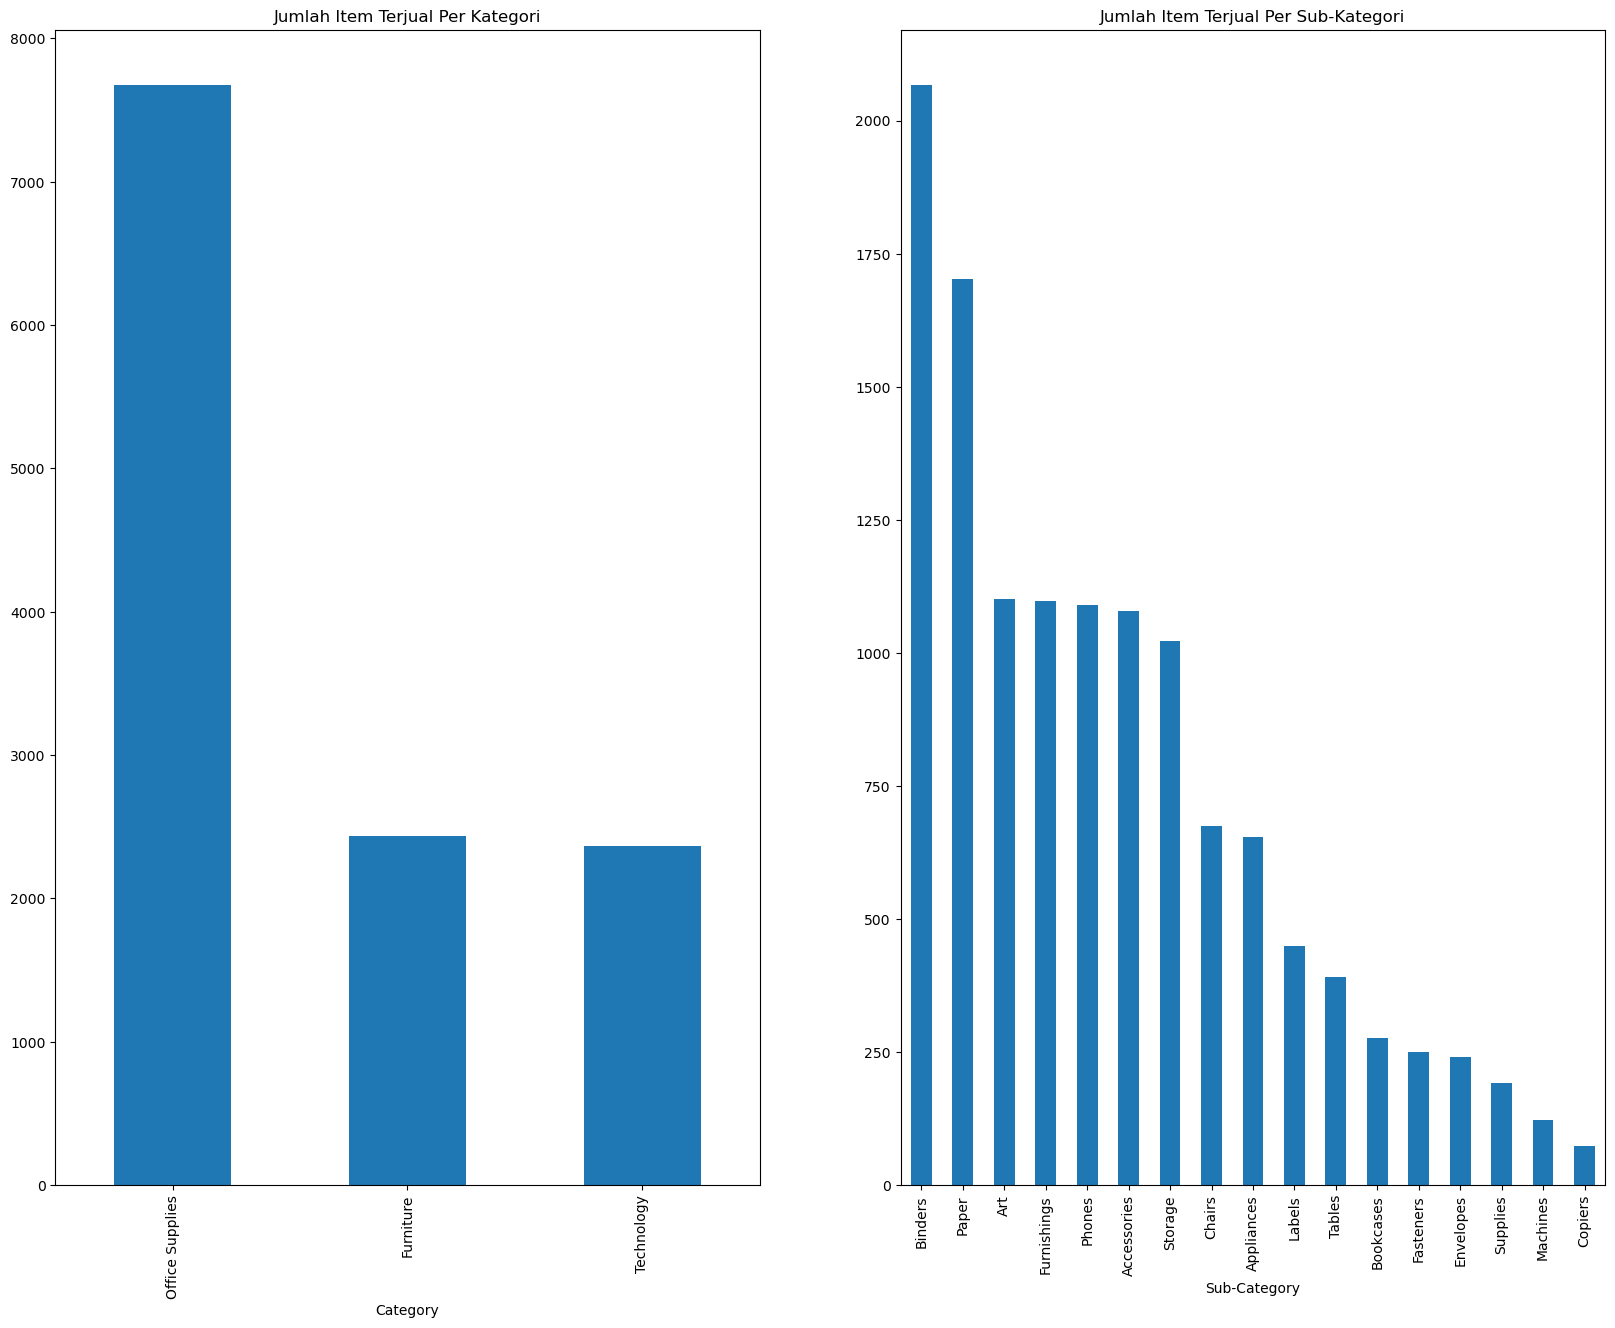

In [21]:
fig, axs = plt.subplots(2, figsize=(20, 15))
plt.subplot(1, 2, 1)
df.groupby('Category')['Quantity'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Jumlah Item Terjual Per Kategori")
plt.subplot(1, 2, 2)
df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Jumlah Item Terjual Per Sub-Kategori")

#### Insight

Berdasarkan visualisasi jumlah item terjual dan total salesnya, maka kita dapat menyimpulkan bahwa kategori office supplies seperti Binders dan Paper merupakan barang yang paling banyak dibeli oleh Warga United States, sedangkan berdasarkan jumlah sales teknologi merupakan kategori yang paling laku terlebih utama yaitu produk handphone. Hal ini disebabkan karena produk office supplies walau kuantitasnya banyak, harga office supplies secara sendiri termasuk murah, sedangkan handphone merupakan produk yang tergolong mahal, sehingga sales yang masih relatif tinggi pada handphone juga menyebabkan tingginya jumlah sales pada kategori teknologi.

### 2. Dimana kota, state, dan region dengan jumlah sales terbanyak? 

Untuk menjawab pertanyaan No.2, kita akan groupby pada kolom City, State, dan Region dan menggunakan sum dari kolom sales untuk melakukan bar plot

In [22]:
df.groupby('City')['Sales'].sum().sort_values(ascending=False)

City
New York City    86939.6010
Seattle          56990.8200
Los Angeles      48875.6925
Philadelphia     41595.5020
San Francisco    37197.5510
                    ...    
Ormond Beach         2.8080
Edinburg             2.3680
Jupiter              2.0640
Elyria               1.8240
Abilene              1.3920
Name: Sales, Length: 350, dtype: float64

Text(0.5, 1.0, 'Top 10 Sales based on City')

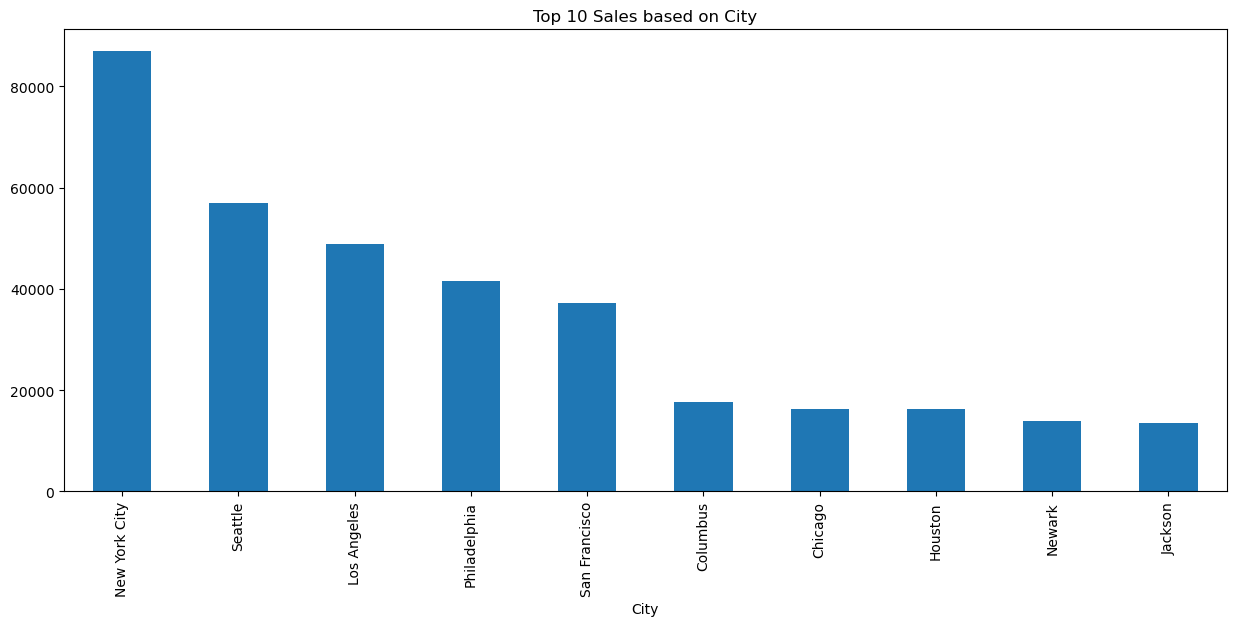

In [23]:
x = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(15,6))
x.plot(kind='bar')
plt.title("Top 10 Sales based on City")

In [24]:
df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

Region
West       250128.3655
East       213082.9040
Central    147098.1282
South      122905.8575
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Sales based on State')

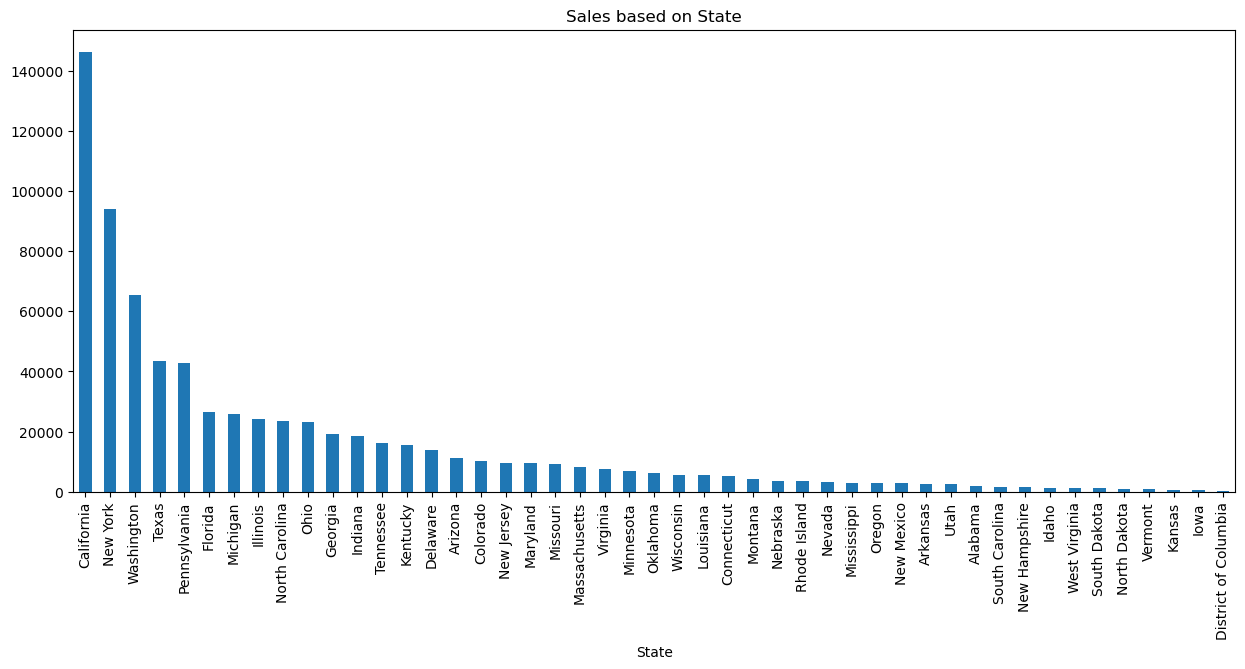

In [25]:
x = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
x.plot(kind='bar')
plt.title("Sales based on State")

Text(0.5, 1.0, 'Sales based on Region')

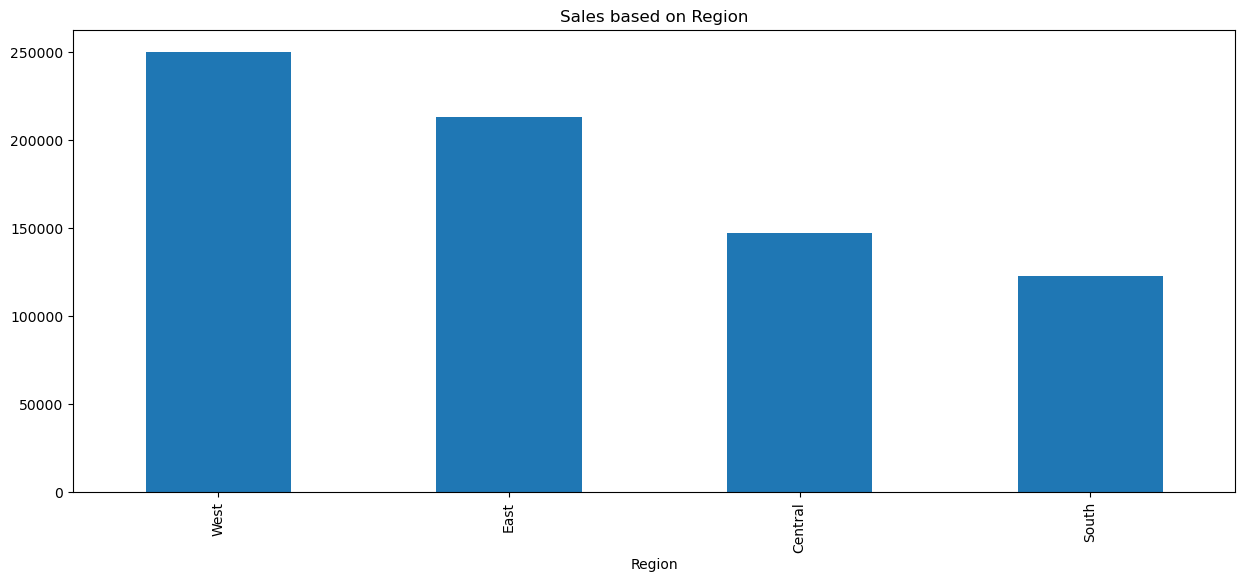

In [26]:
x = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
x.plot(kind='bar')
plt.title("Sales based on Region")

#### Insight

Dari kedua visualisasi jumlah sales terhadap region dan kota, kita dapat menyimpulkan bahwa kota yang mempunyai jumlah sales paling tinggi merupakan kota dengan jumlah penduduk dan jumlah kantor yang tinggi seperti New York City, Seattle, dan Los Angeles. Karena kota-kota tersebut juga umumnya terletak di bagian barat dan timur dari Amerika Serikat, kota dengan sales tersebut juga meningkatkan jumlah sales dari region masing-masing, dimana mayoritas dari kota terlaku adalah kota pada region timur dan barat.

### 3. Bagaimana Trend Profit dan Jumlah Sales dari awal 2017 sampai akhir 2017?

Kode dibawah bertujuan untuk menunjukkan trend profit dan jumlah sales pada United States dari awal 2017 sampai akhir 2017

Text(0.5, 1.0, 'Quantity of Item Sales Trend')

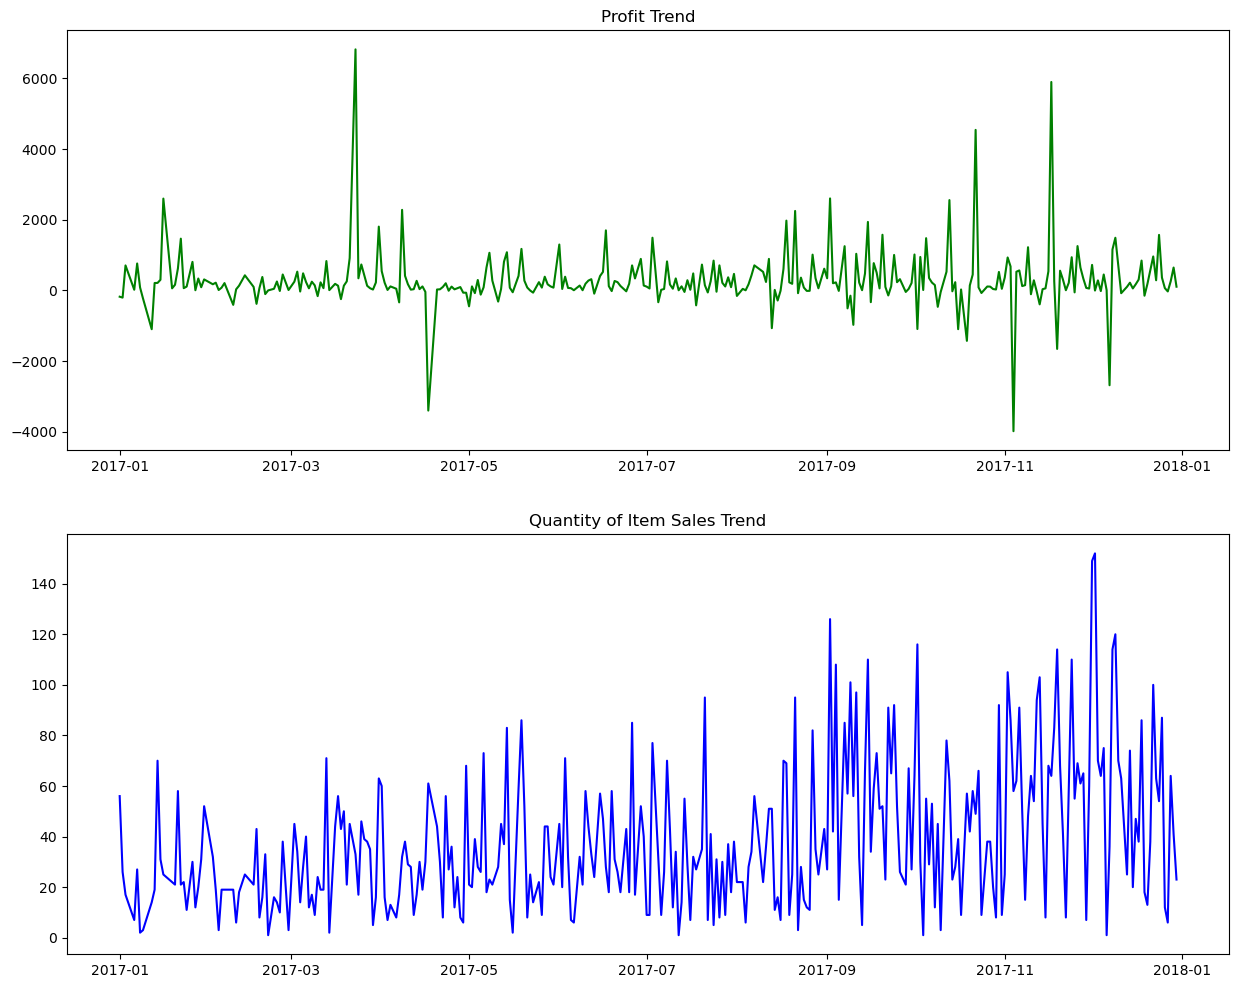

In [27]:
# Hitung trend sales dari awal tahun ke akhir tahun.
fig, axs = plt.subplots(2, figsize=(15, 12))
plt.subplot(2, 1, 1)
plt.plot(df.groupby('Order Date')['Profit'].sum(),color='green')
plt.title("Profit Trend")
plt.subplot(2, 1, 2)
plt.plot(df.groupby('Order Date')['Quantity'].sum(),color='blue')
plt.title("Quantity of Item Sales Trend")

#### Insight

plot line profit diatas menunjukkan bahwa nilai dari profit cenderung naik turun, tetapi profit yang nilainya positif(untung) lebih sering terjadi dibandingkan dengan yang bernilai negatif(rugi), profit yang bernilai negatif dapat disebabkan oleh adanya program diskon yang banyak pada barang yang lagi diminati banyak customer sehingga perusahaan menerima loss dengan tradeoff mendapat exposure dan store recogniztion, karena setelah waktu program diskon sudah selesai, profitnya akan meningkat lagi ke jumlah yang sehat untuk waktu yang cukup lama. 

Sedangkan plot line jumlah sales menunjukkan bahwa jumlah sales per-harinya memiliki peningkatan yang tidak terlalu berbeda dari awal tahun ke akhir tahun, apabila dibandingkan dengan plot line profit, maka kemungkinan profit yang tinggi disebabkan oleh penjualan barang yang mahal tiap unitnya (Handphone,Copiers) dibanding dengan produk murah per unit (Binders,etc)

### 4. Bagaimana profit yang dihasilkan oleh Category, Sub-Category dan Segment?

Kode dibawah bertujuan untuk menghitung profit dari kategori dan sub-kategori menggunakan metode yang sama pada penjabaran no.2

<AxesSubplot:xlabel='Category'>

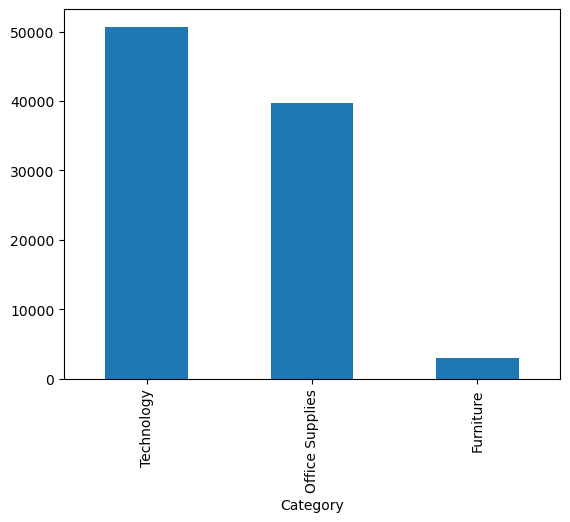

In [28]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Sub-Category'>

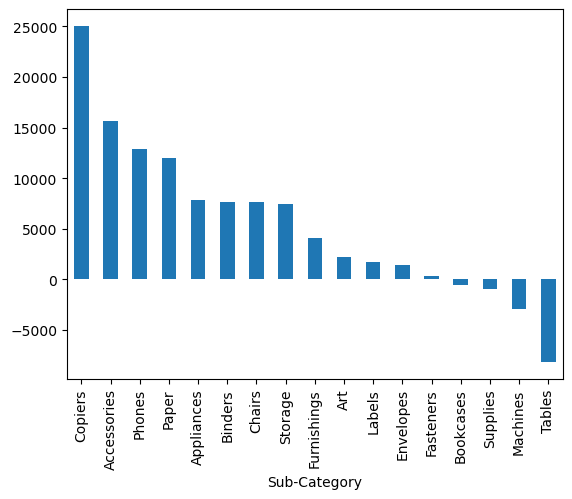

In [29]:
df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).plot(kind='bar')

#### Insight

Dari Bar plot profit berdasarkan kategori dan sub-kategori, produk yang paling banyak profitnya merupakan produk teknologi yang umum dipakai pada perkantoran seperti photocopier dan office supplies. Tingginya profit dari produk tersebut juga berkaitan erat dengan kota dengan sales tertinggi yang sudah dijelaskan pada penjabaran no.2, dimana kota yang paling profitable untuk perusahaan merupakan kota yang ramai dan merupakan kelas menengah atas dan kota yang banyak perkantoran. Sehingga kita dapat menyimpulkan bahwa mayoritas produk yang menguntungkan perusahaan kita merupakan produk yang berkaitan erat dengan keperluan kantor pada kota-kota tersebut dan penduduk pada kota tersebut yang belanja produk dengan barang yang mahal seperti handphone. 

### 5. Bagaimana perbandingan antara sales dan profit untuk tiap segment?

Langkah untuk menjawab nomor 5, sama seperti nomor 4. Cukup mengganti kolom saja. Untuk pie chart, gunakan .plot(kind='pie')

<AxesSubplot:xlabel='Segment'>

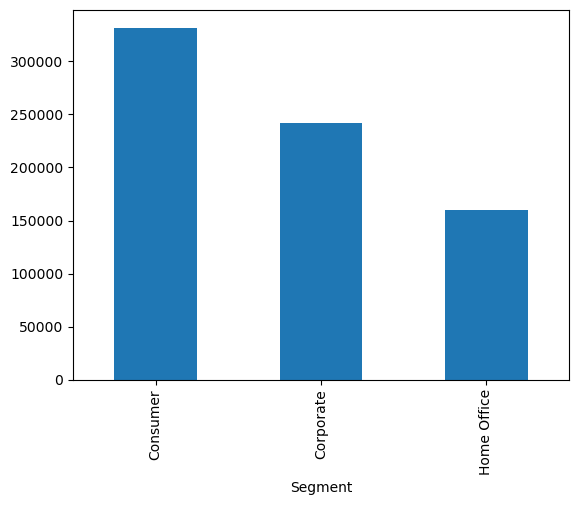

In [30]:
df.groupby('Segment')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:ylabel='Sales'>

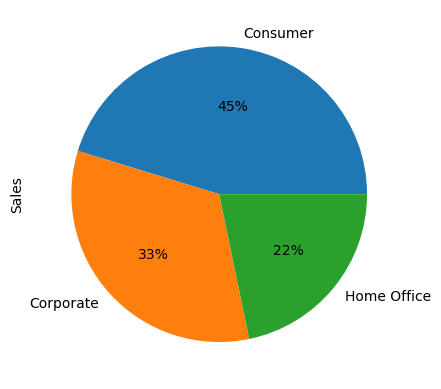

In [31]:
df.groupby('Segment')['Sales'].sum().plot(kind='pie',autopct='%1.0f%%')

<AxesSubplot:xlabel='Segment'>

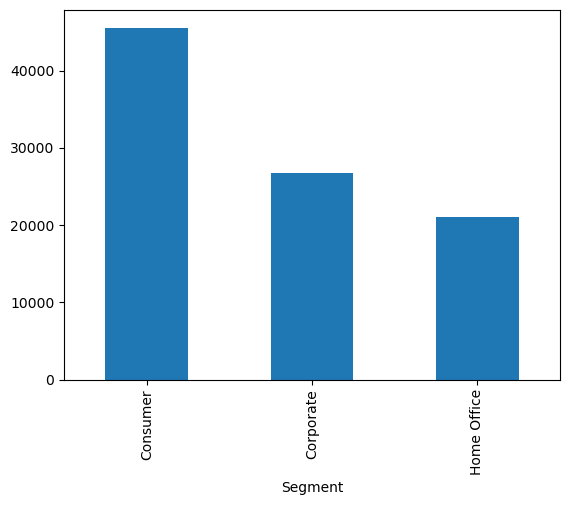

In [32]:
df.groupby('Segment')['Profit'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:ylabel='Profit'>

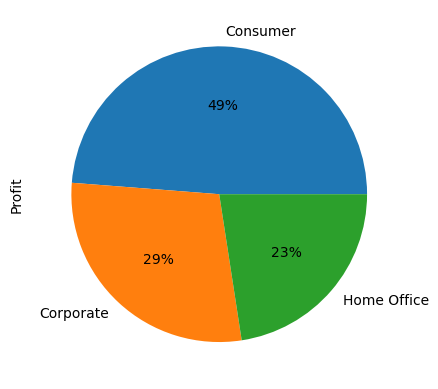

In [33]:
df.groupby('Segment')['Profit'].sum().plot(kind='pie',autopct='%1.0f%%')

#### Insight

Visualisasi Bar dan pie chart diatas menunjukkan bahwa mayoritas customer base yang membawa profit terbanyak untuk perusahaan kita adalah merupakan konsumer biasa dan perkantoran, yang sesuai dengan penjelasan sebelumnya, dimana  produk yang paling banyak profitnya merupakan produk teknologi yang umum dipakai pada perkantoran seperti photocopier dan office supplies dan produk untuk masyarakat yang kelas atas menengah seperti pembelian handphone. 

### 6. Bagaimana Profit Ratio dari tiap state?

Langkah pertama adalah menghitung profit ratio menggunakan nilai profit yang digroup ke tiap state yang dibagi dengan sales, setelah dihitung nilai dari profit ratio tiap state, nilai tersebut diplot bar.

In [34]:
# Menghitung profit ratio dengan membagi profit dengan sales
prof = df.groupby(by = ['State'])['Profit'].sum()
sal = df.groupby(by = ['State'])['Sales'].sum()
prof_rat = ((prof/sal)*100)

In [35]:
prof_rat

State
Alabama                 27.150395
Arizona                -11.460891
Arkansas                35.433171
California              20.060654
Colorado               -43.067270
Connecticut             27.882100
Delaware                44.007360
District of Columbia    45.092593
Florida                  0.923158
Georgia                 33.653315
Idaho                   16.133024
Illinois               -27.700672
Indiana                 27.756539
Iowa                    38.506414
Kansas                  35.922308
Kentucky                30.587514
Louisiana               22.046589
Maryland                29.419432
Massachusetts           21.006643
Michigan                32.855451
Minnesota               36.560456
Mississippi             34.316972
Missouri                18.537778
Montana                 34.661349
Nebraska                25.731775
Nevada                   9.725282
New Hampshire           31.814261
New Jersey              23.894751
New Mexico              29.355096
New York

<AxesSubplot:xlabel='State'>

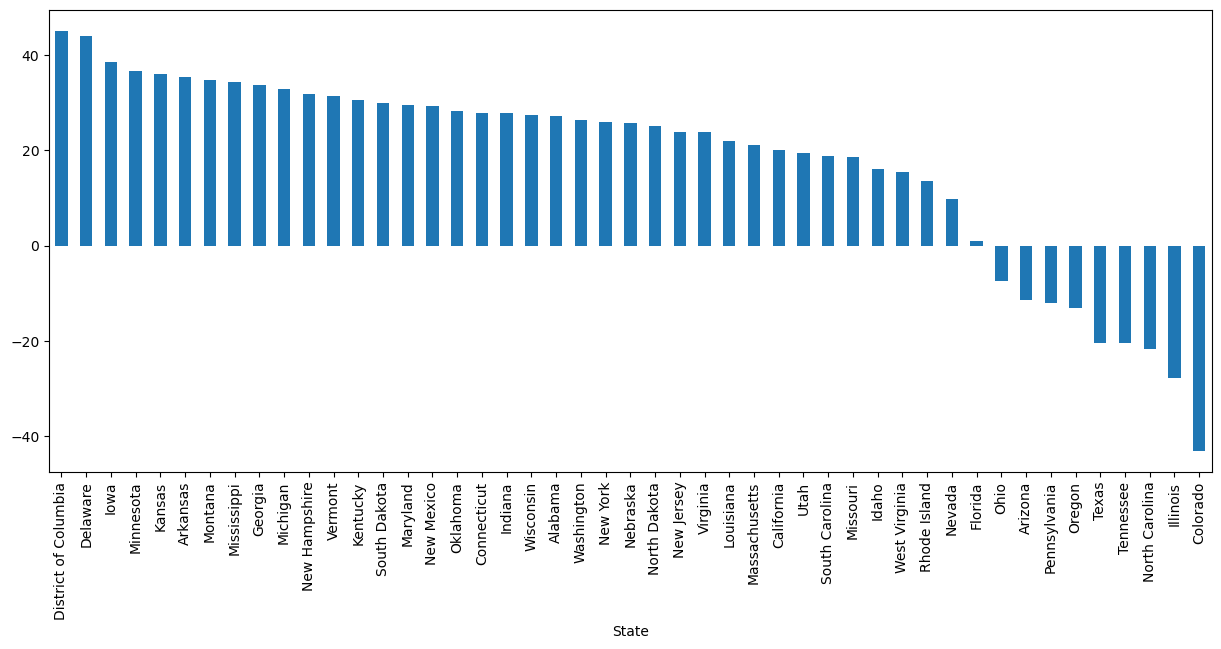

In [36]:
plt.figure(figsize=(15,6))
prof_rat.sort_values(ascending=False).plot(kind='bar')

#### Insight

Berdasarkan bar plot diatas, state yang memiliki profit ratio paling tinggi merupakan state dengan jumlah sales yang rendah seperti Columbia, Delaware dan Iowa berdasarkan hasil penjabaran no.2. Tetapi, profit pada state tersebut walau sedikit namun tidak ada yang merugikan, sehingga profit rationya tinggi. Sehingga, lebih baik untuk memfokuskan peningkatan profit ratio pada state dengan salesnya yang tinggi seperti New York, California dan Texas, dan sebaiknya difokuskan terlebih dahulu pada yang state dengan sales banyak tetapi rasionya masih negatif/merugikan seperti Texas.

### 7. Bagaimana Total Diskon dari tiap region berdasarkan tiap kategorinya?

Kode dibawah bertujuan untuk membuat bar plot pada keempat region dengan 3 bar plot pada tiap region dengan hue/warna berbeda untuk membedakan nilai diskon tiap kategori.

In [37]:
y = df.groupby(['Category','Region'])['Discount'].sum().reset_index(name='Total Discount')

In [38]:
dfbar = df.groupby(by = ['Category', 'Region'])['Discount'].sum().reset_index()

<AxesSubplot:xlabel='Region', ylabel='Discount'>

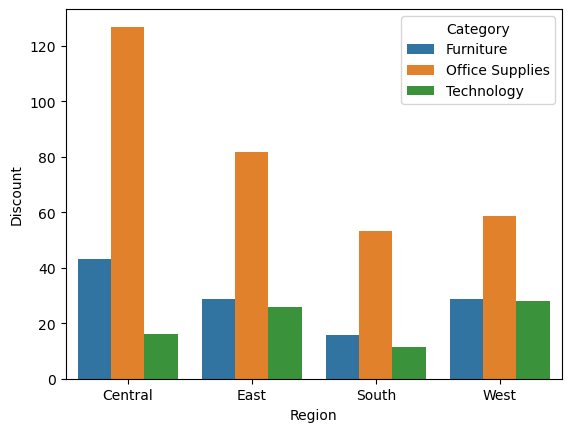

In [39]:
fig, ax = plt.subplots()
sns.barplot(ax = ax, data = dfbar, x = 'Region', y = 'Discount', hue = 'Category')

#### Insight

Bar plot diatas menunjukkan total dari diskon untuk semua sales yang terjadi pada tiap region di United States, kategori produk office supplies mempunyai total diskon terbanyak karena jumlah sales kategori tersebut jauh lebih banyak dibandingkan dengan kategori lain, sehingga profit office supplies lebih tinggi juga berdasarkan penjabaran no.1. 

Sedangkan untuk kategori furniture dan teknologi, kedua kategori tersebut merupakan produk berkategori mahal dimana jumlah sales teknologi mirip dengan sales furniture. Namun, berdasarakan bar plot total diskon diatas menunjukkan bahwa furniture lebih sering diskon dibandingkan dengan teknologi, keseringan diskon tersebut pada produk furniture menyebabkan profit dari furniture jauh lebih rendah dibandingkan dengan profit dari teknologi, ditambah dengan harga produk teknologi yang lebih mahal dibanding dengan furniture juga merupakan penyebab perbedaan profit yang tinggi. 

Discount ini merupakan faktor utama mengapa beberapa state seperti Texas yang mempunyai sales banyak tetapi profit ratio yang negatif berbeda dengan state seperti New York yang juga mempunyai sales banyak tapi profit ratio yang tinggi.

### 8. Bagaimana central tendency dan variasi dari profit untuk tiap region? Dan apakah ada outlier dari tiap region? (Statistik Deskriptif)

Langkah pertama adalah menentukan nilai median dan mean untuk menentukan central tendency dari nilai profit pada tiap region, serta perhitungan standar deviasi untuk menentukan variasi pada data.

In [40]:
df.groupby('Region')['Profit'].median()

Region
Central     5.0617
East        8.0406
South       7.2576
West       10.8682
Name: Profit, dtype: float64

In [41]:
df.groupby('Region')['Profit'].mean()

Region
Central     9.705455
East       36.080957
South      17.082834
West       40.008179
Name: Profit, dtype: float64

In [42]:
df.groupby('Region')['Profit'].std()

Region
Central    206.972463
East       250.115322
South      235.677651
West       259.365618
Name: Profit, dtype: float64

Selanjutnya akan menghitung skew untuk menentukan perhitungan pada outlier handling.

In [43]:
df.groupby('Region')['Profit'].skew()

Region
Central    -3.243809
East       13.370834
South      -8.576171
West       14.255669
Name: Profit, dtype: float64

In [44]:
south = df[df['Region'] == 'South']['Profit']
central = df[df['Region'] == 'Central']['Profit']
east = df[df['Region'] == 'East']['Profit']
west = df[df['Region'] == 'West']['Profit']

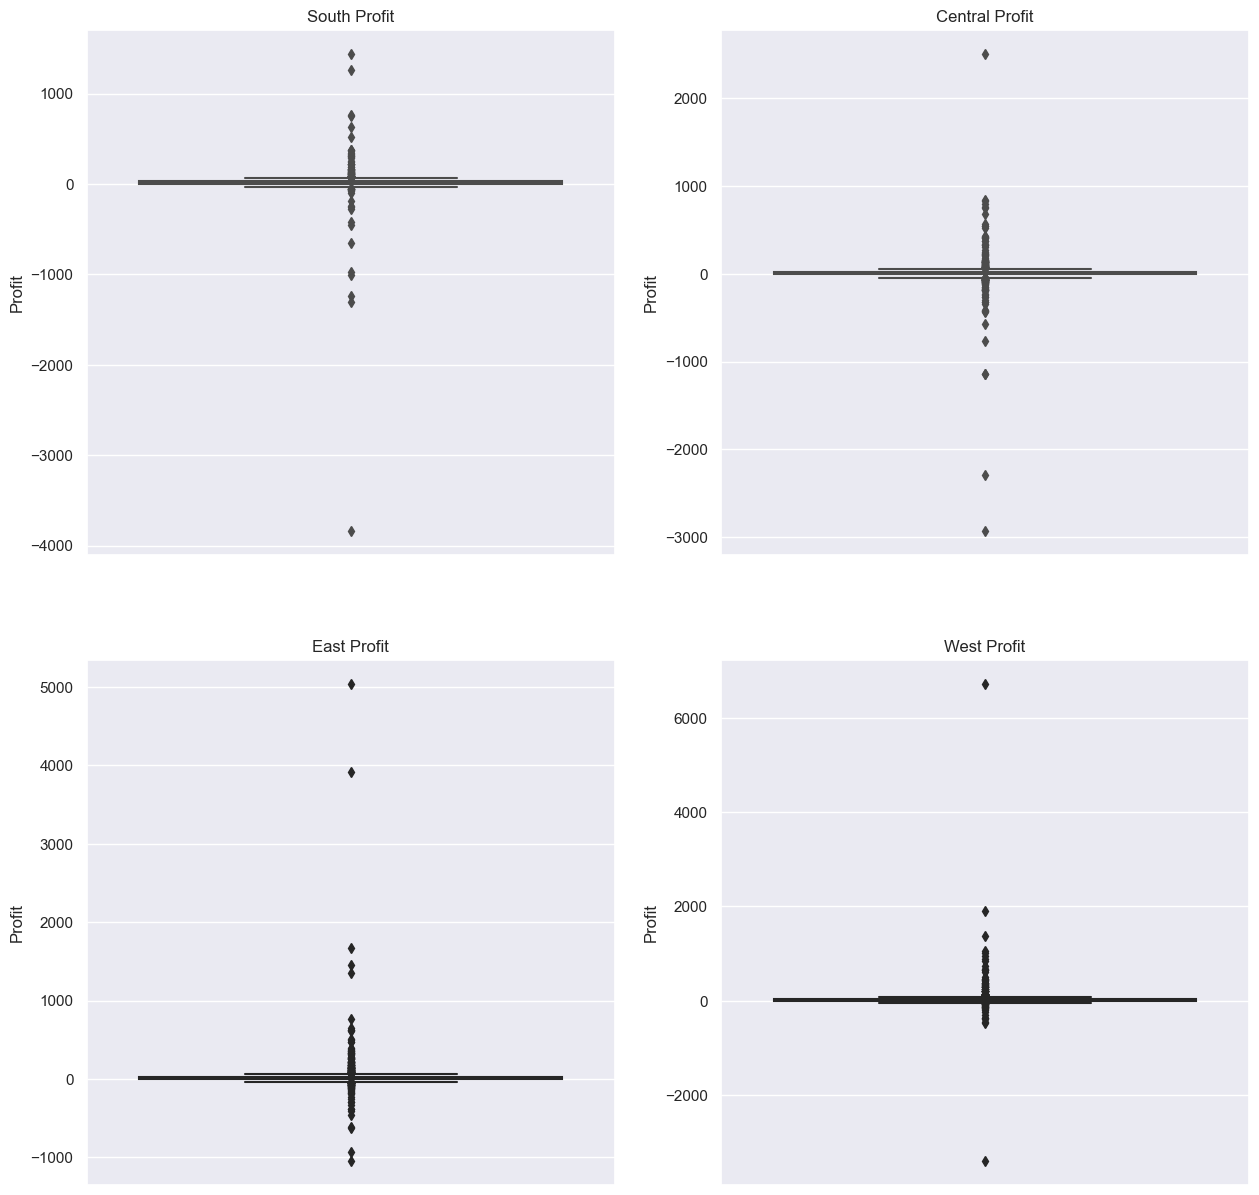

In [45]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.boxplot(y = south,data=df, color="blue",ax=axs[0, 0]).set_title('South Profit')
sns.boxplot(y = central,data=df, color="red",ax=axs[0, 1]).set_title('Central Profit')
sns.boxplot(y = east,data=df, color="green",ax=axs[1, 0]).set_title('East Profit')
sns.boxplot(y = west,data=df, color="olive",ax=axs[1, 1]).set_title('West Profit')

plt.show()

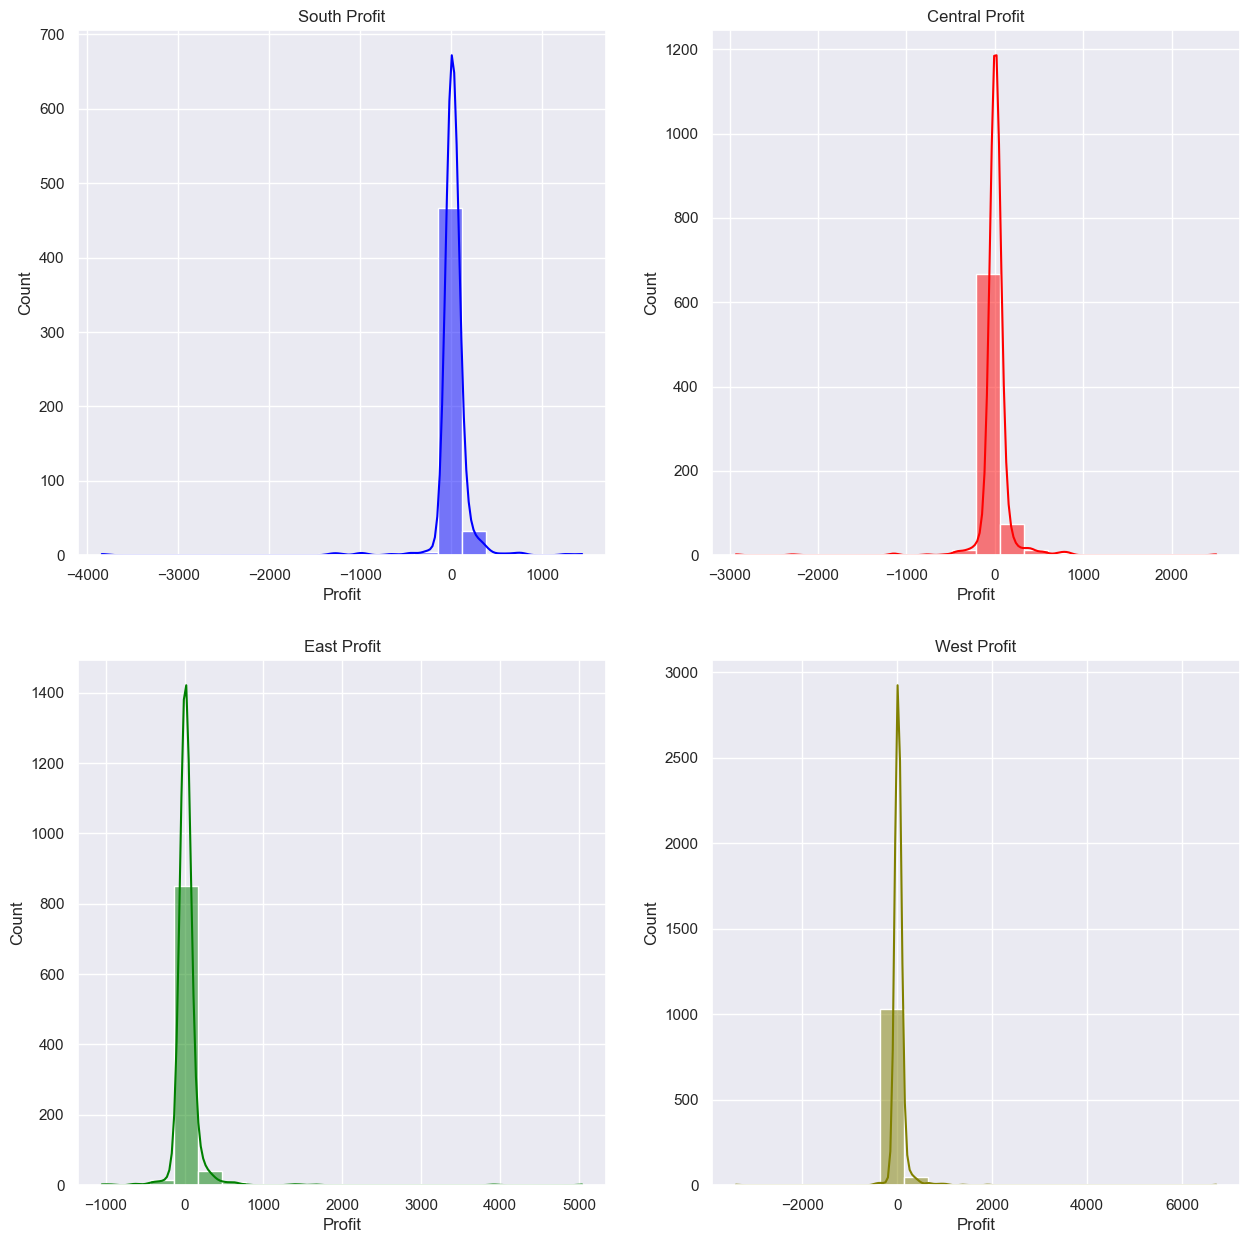

In [46]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.histplot(south, kde=True,bins=20, color="blue",ax=axs[0, 0]).set_title('South Profit')
sns.histplot(central, kde=True,bins=20, color="red",ax=axs[0, 1]).set_title('Central Profit')
sns.histplot(east, kde=True,bins=20, color="green",ax=axs[1, 0]).set_title('East Profit')
sns.histplot(west, kde=True,bins=20, color="olive",ax=axs[1, 1]).set_title('West Profit')

plt.show()

Fungsi dibawah bertujuan untuk membuang outlier pada nilai yang akan dilakukan grouping, yaitu membuang outlier nilai profit berdasarkan nilai IQR tiap region

In [47]:
def is_outlier(s):
    '''fungsi ini bertujuan untuk melakukan outlier handling pada nilai profit tiap region'''
    q75, q25 = np.percentile(s, [75 ,25])
    upper_limit = q75 + 3*(q75-q25)
    lower_limit = q75 - 3*(q75-q25)
    return s.between(lower_limit, upper_limit)

In [48]:
df = df[df.groupby('Region')['Profit'].apply(is_outlier)]

In [49]:
south = df[df['Region'] == 'South']['Profit']
central = df[df['Region'] == 'Central']['Profit']
east = df[df['Region'] == 'East']['Profit']
west = df[df['Region'] == 'West']['Profit']

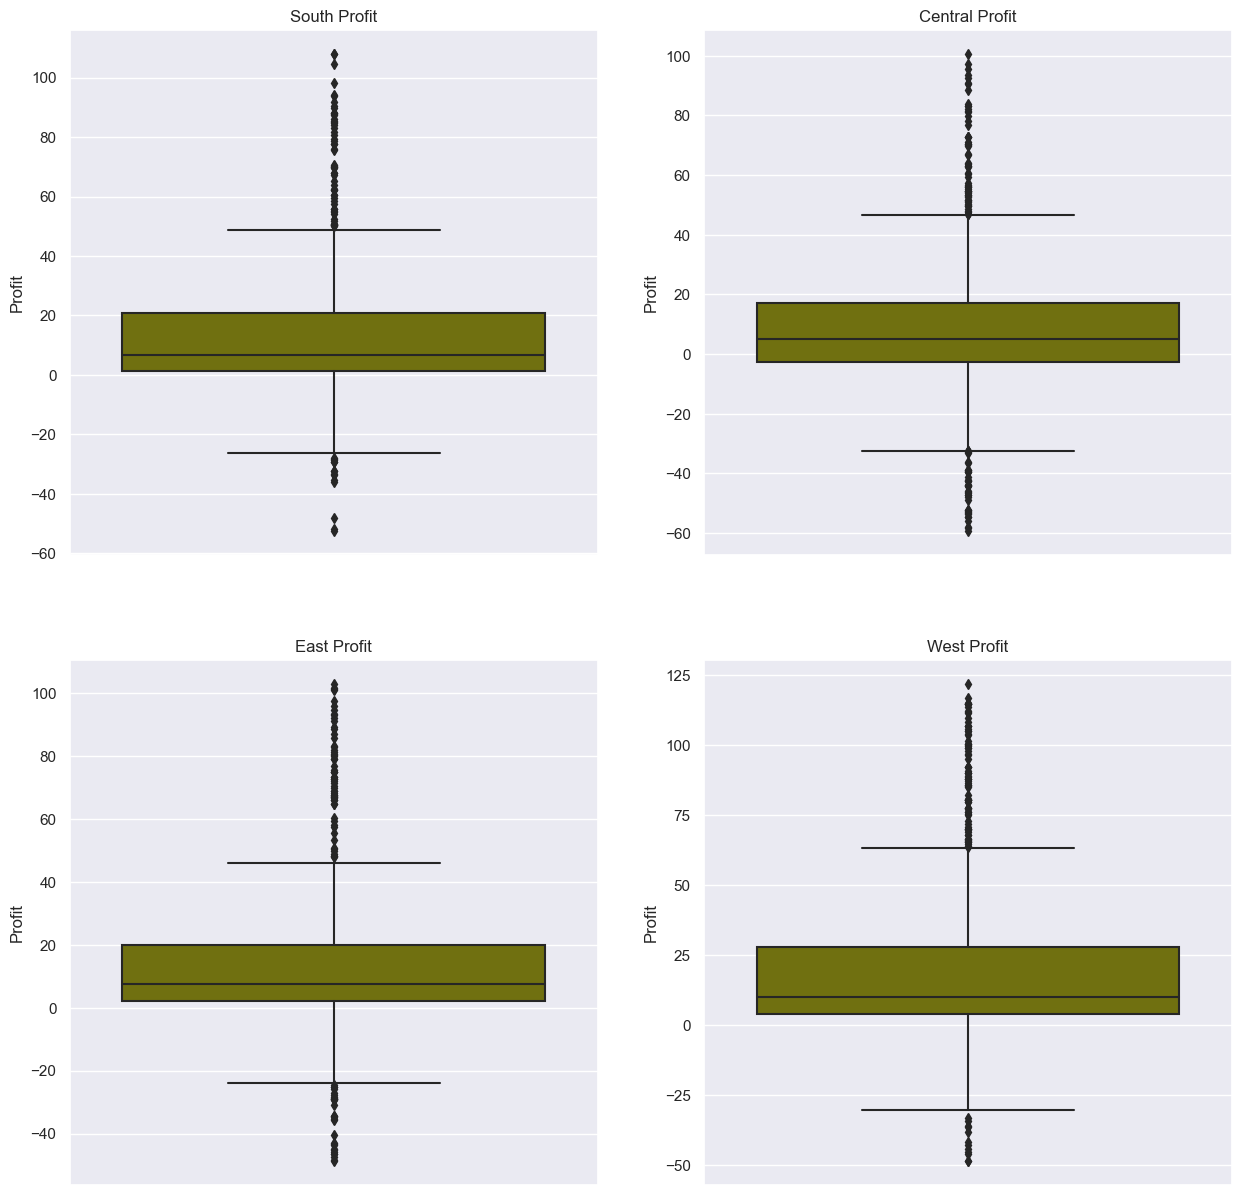

In [50]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.boxplot(y = south,data=df, color="olive",ax=axs[0, 0]).set_title('South Profit')
sns.boxplot(y = central,data=df, color="olive",ax=axs[0, 1]).set_title('Central Profit')
sns.boxplot(y = east,data=df, color="olive",ax=axs[1, 0]).set_title('East Profit')
sns.boxplot(y = west,data=df, color="olive",ax=axs[1, 1]).set_title('West Profit')

plt.show()

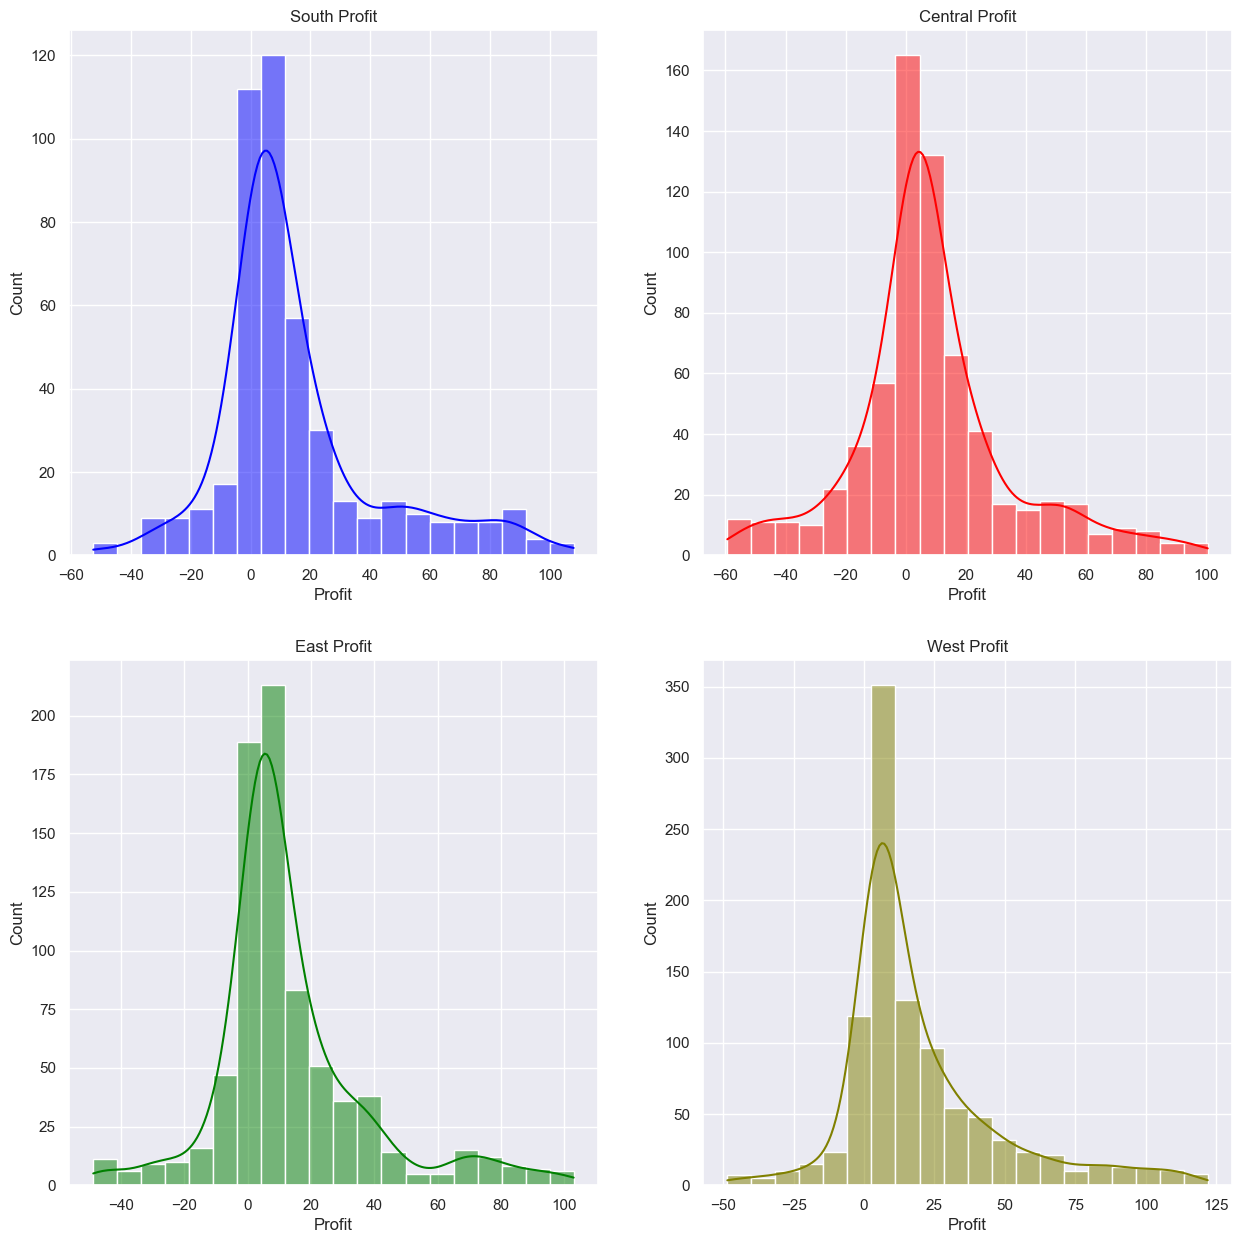

In [51]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.histplot(south, kde=True,bins=20, color="blue",ax=axs[0, 0]).set_title('South Profit')
sns.histplot(central, kde=True,bins=20, color="red",ax=axs[0, 1]).set_title('Central Profit')
sns.histplot(east, kde=True,bins=20, color="green",ax=axs[1, 0]).set_title('East Profit')
sns.histplot(west, kde=True,bins=20, color="olive",ax=axs[1, 1]).set_title('West Profit')

plt.show()

#### Insight

Perhitungan awal yang dilakukan adalah untuk menghitung median, mean dan standar deviasi dari profit yang digroup berdasarkan regionnya. Berdasarkan ketiga nilai tersebut, kita dapat melihat bahwa nilai dari standar deviasi jauh lebih tinggi dibandingkan dengan nilai mean dan mediannya, sehingga untuk mendapat gambaran penuhnya, kita menghitung skew untuk profit tiap region dan didapat nilai skew yang extreme untuk keempat region. Hal tersebut menunjukkan bahwa outlier pada data di kasus ini sangat banyak sehingga outlier tersebut mempengaruhi distribusi dari data.

Pada kasus ini, dilakukan outlier handling menggunakan 3*IQR karena skew value profit pada tiap region melebihi 1 atau dibawah -1. Walaupun sudah dilakukan outlier handling, pada boxplot terakhir terlihat bahwa jumlah outliernya masih banyak walaupun density plot diatas sudah tidak terlalu skewed. Hal ini wajar karena banyaknya variasi produk dengan jumlah harga yang sangat berbeda, dimana ada office supplies dengan jumlah penjualan yang banyak dan harga murah, furniture yang harga menengah atas tetapi sering mengalami diskon, dan teknologi dimana harga per unitnya paling mahal. 

Dengan banyaknya variasi harga dan diskon produk seperti kasus ini, maka wajar saja akan ada variasi profit yang berbeda-beda tiap harinya. Sehingga, ada baiknya juga kita menganalisis dan visualisasi data profit dengan memperhitungkan nilai-nilai outlier tersebut.

### 9. Apakah ada stastical significance pada rata-rata profit tiap region dibandingkan dengan satu sama lain? (Statistik Inferential)

Untuk menentukan apakah ada perbedaan profit tiap region, kita akan menggunakan two way anova untuk menentukan apakah ada perbedaan antara rata-rata profit pada tiap region, null hypothesis dan alternative hypothesis adalah:

- H0 = mean profit tidak berbeda antara region

- H1 = mean profit berbeda antara region

In [52]:
model = ols('Profit ~ Region',
            data=df).fit()
result = sm.stats.anova_lm(model, type=2)
print(result)

              df        sum_sq       mean_sq          F        PR(>F)
Region       3.0  5.362455e+04  17874.849949  26.268804  9.247194e-17
Residual  2896.0  1.970610e+06    680.459220        NaN           NaN


#### Insight

Berdasarkan test ANOVA yang sudah dilakukan dan nilai p-value, maka dapat disimpulkan bahwa nilai rata-rata profit pada satu region tidak sama dengan rata-rata profit region yang lain. Perbedaan profit yang dihitung sudah dinilai cukup besar sehingga ada perbedaan signifikan, yang menunjukkan bahwa perbedaan rata-rata profit tidak terjadi karena kemungkinan melainkan karena aslinya nilai mean dari tiap region memang selalu berbeda.

## Kesimpulan dan Analisis

Berdasarkan problem statement dan semua penjabaran yang sudah dilakukan, kesimpulan yang dapat diambil adalah:

- Kategori produk yang mempunyai jumlah sales paling banyak merupakan produk berkategori office supplies seperti binders, sedangkan kategori yang memiliki profit paling tinggi merupakan produk teknologi diikuti dengan profit dari kategori office supplies yang profitnya hampir mendekati profit produk kategori teknologi.

- Region yang paling banyak membawa profit merupakan region barat dan region timur, profit yang tinggi tersebut disebabkan karena kota pada region barat dan timur merupakan kota-kota yang mempunyai populasi yang tinggi dan merupakan pusat perkantoran untuk negara United States. Sehingga tingginya jumlah profit dari produk office supplies dan teknologi yang berhubungan dengan pekerjaan kantor (seperti:photocopier,binders,etc).

- Perusahaan dapat memfokuskan produksi terhadap produksi barang-barang office supplies dan teknologi yang berkaitan pada keperluan kantor pada kota-kota yang ramai serta produk teknologi untuk masyarakat umum yang laku seperti handphone untuk memaksimalkan profit pada tahun 2018 dan kedepannya.

- Dari hypothesis yang sudah dilakukan, rata-rata profit untuk tiap region berbeda secara signifikan antara lain. Sehingga, tiap region akan selalu berbeda rata-rata nilai profitnya dibandingkan dengan sesama region.